In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("data/haberman.csv")
data.shape

(305, 4)

In [4]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
headerList=["age", "opYear", "axilNodes", "survStatus"]
data = pd.read_csv("data/haberman.csv", names=headerList)
data.head()

,age,opYear,axilNodes,survStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
data.survStatus.value_counts()

1    225
2     81
Name: survStatus, dtype: int64

Most of the patients in this record survived 5 years or more after their operation.

Univariate analysis means analysis using a single variable (against the target feature?). This gives the frequency/count of occurrences of the variable and lets us understand the distribution of that variable at various values.

In [11]:
sns.set_style("whitegrid")

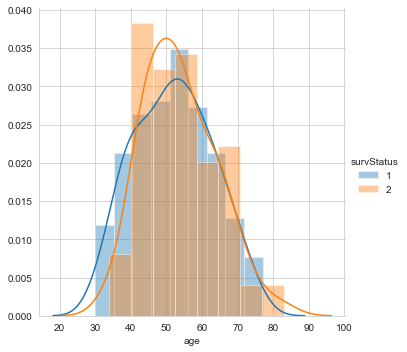

In [9]:
# survival status by age
sns.FacetGrid(data,
             hue="survStatus",
             height=5).map(sns.distplot, "age").add_legend()

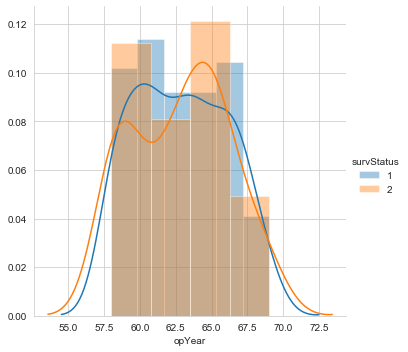

In [16]:
# survival status by operation year
sns.FacetGrid(data,
             hue="survStatus",
             height=5).map(sns.distplot,"opYear").add_legend()

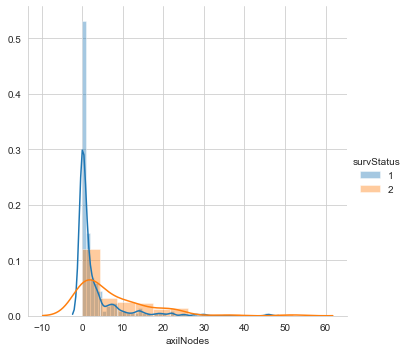

In [17]:
# survival status by number of positive axillary nodes detected
sns.FacetGrid(data,
             hue="survStatus",
             height=5).map(sns.distplot,"axilNodes").add_legend()

The disadvantage of PDF: can't say exactly how many data points are in a range / lower or higher than a particular value.

To find this, use a cumulative density function (CDF).

In [18]:
sYes = data[data.survStatus==1]
sNo = data[data.survStatus==2]

In [21]:
sYes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 303
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         225 non-null    int64
 1   opYear      225 non-null    int64
 2   axilNodes   225 non-null    int64
 3   survStatus  225 non-null    int64
dtypes: int64(4)
memory usage: 8.8 KB


In [22]:
sNo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 7 to 305
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         81 non-null     int64
 1   opYear      81 non-null     int64
 2   axilNodes   81 non-null     int64
 3   survStatus  81 non-null     int64
dtypes: int64(4)
memory usage: 3.2 KB


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


Text(0, 0.5, 'FREQUENCY')

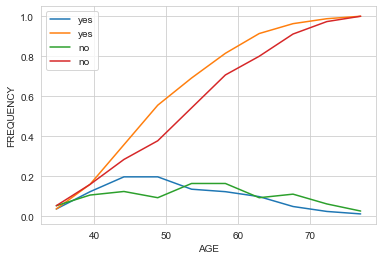

In [26]:
count, bin_edges = np.histogram(sNo.age, 
                                bins=10, 
                                density = True)
#count : the number of data points at that particular age value
#bin_edges :the seperation values of the X-axis (the feature under analysis)
#bins = the number of buckets of seperation

pdf = count/sum(count)
print(pdf)

# To get cdf, we want cumulative values of the count.
#In numpy, cumsum() does cumulative sum 
cdf = np.cumsum(pdf)
print(cdf)

count, bin_edges = np.histogram(sYes.age, 
                                bins=10, 
                                density = True)
pdf2 = count/sum(count)
cdf2 = np.cumsum(pdf2)

plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:],cdf,label='yes')
plt.plot(bin_edges[1:],pdf2,label='no')
plt.plot(bin_edges[1:],cdf2,label='no')
plt.legend()
 #adding labels
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


Text(0, 0.5, 'FREQUENCY')

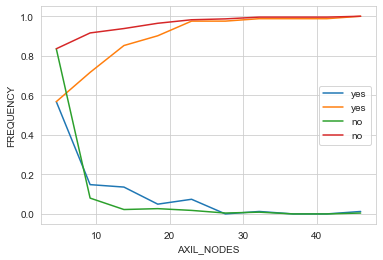

In [27]:
count, bin_edges = np.histogram(sNo.axilNodes, bins=10, density = True)
pdf = count/sum(count)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)

count, bin_edges = np.histogram(sYes.axilNodes, bins=10, density = True)
pdf2 = count/sum(count)
cdf2 = np.cumsum(pdf2)

plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:], cdf,label='yes')
plt.plot(bin_edges[1:],pdf2,label='no')
plt.plot(bin_edges[1:], cdf2,label='no')
plt.legend()
plt.xlabel("AXIL_NODES")
plt.ylabel("FREQUENCY")

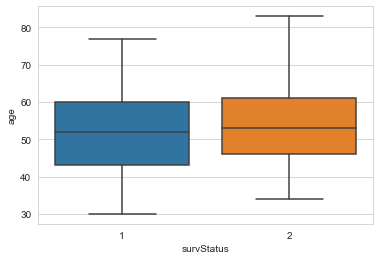

In [29]:
sns.boxplot(data=data, x="survStatus", y="age")

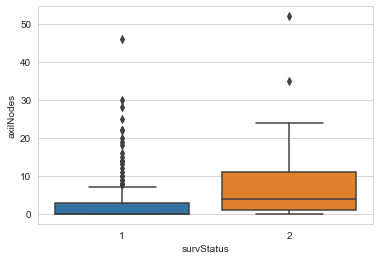

In [30]:
sns.boxplot(data=data, x="survStatus", y="axilNodes")

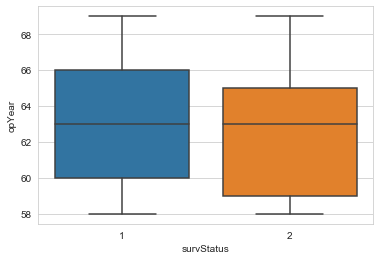

In [31]:
sns.boxplot(data=data, x="survStatus", y="opYear")

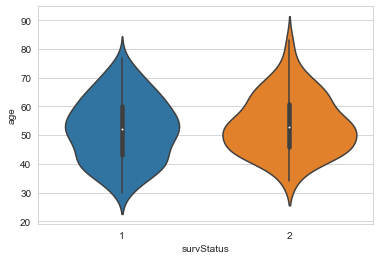

In [32]:
sns.violinplot(data=data, x="survStatus", y="age")

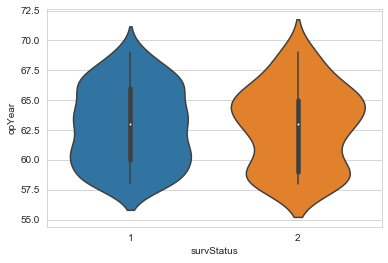

In [33]:
sns.violinplot(data=data, x="survStatus", y="opYear")

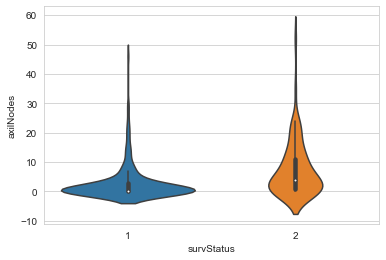

In [34]:
sns.violinplot(data=data, x="survStatus", y="axilNodes")

In bivariate analyses, we analyse the data using two independent variables at a time.

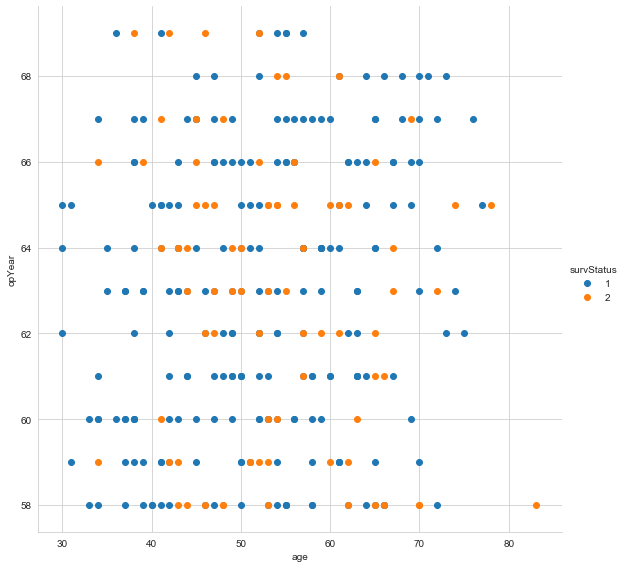

In [35]:
# age vs operation year
sns.FacetGrid(data,
             hue="survStatus",
             height=8).map(plt.scatter, "age", "opYear").add_legend()

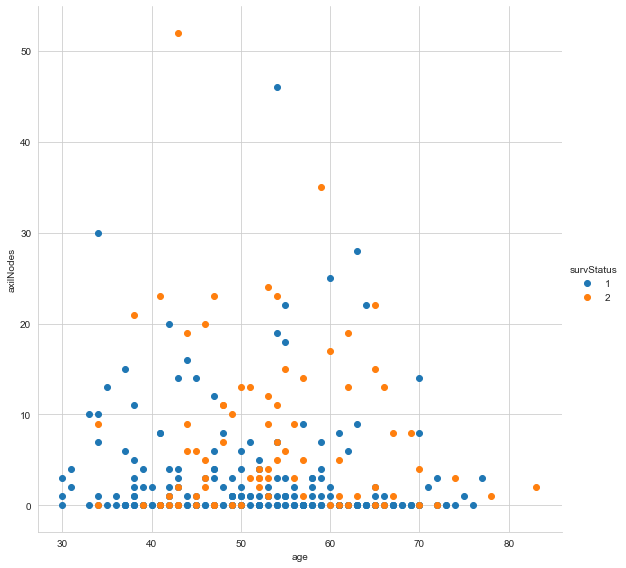

In [38]:
# age vs number of axillary nodes detected
sns.FacetGrid(data, hue="survStatus", height=8) \
   .map(plt.scatter, "age", "axilNodes") \
   .add_legend();

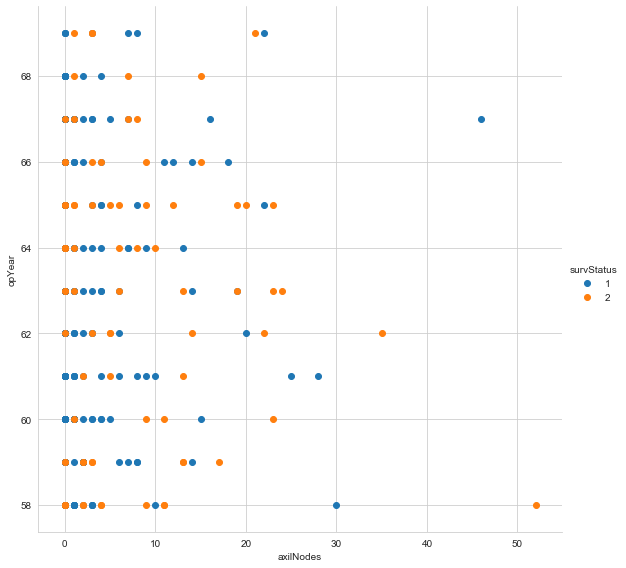

In [40]:
# number of axillary nodules detected vs operation year
sns.FacetGrid(data, hue="survStatus", height=8) \
   .map(plt.scatter, "axilNodes", "opYear") \
   .add_legend();

Pair plots help to compare all variables with each other; basically plotting all possible scatter plots.

Pair plots are usually used when the number of features is around 7.

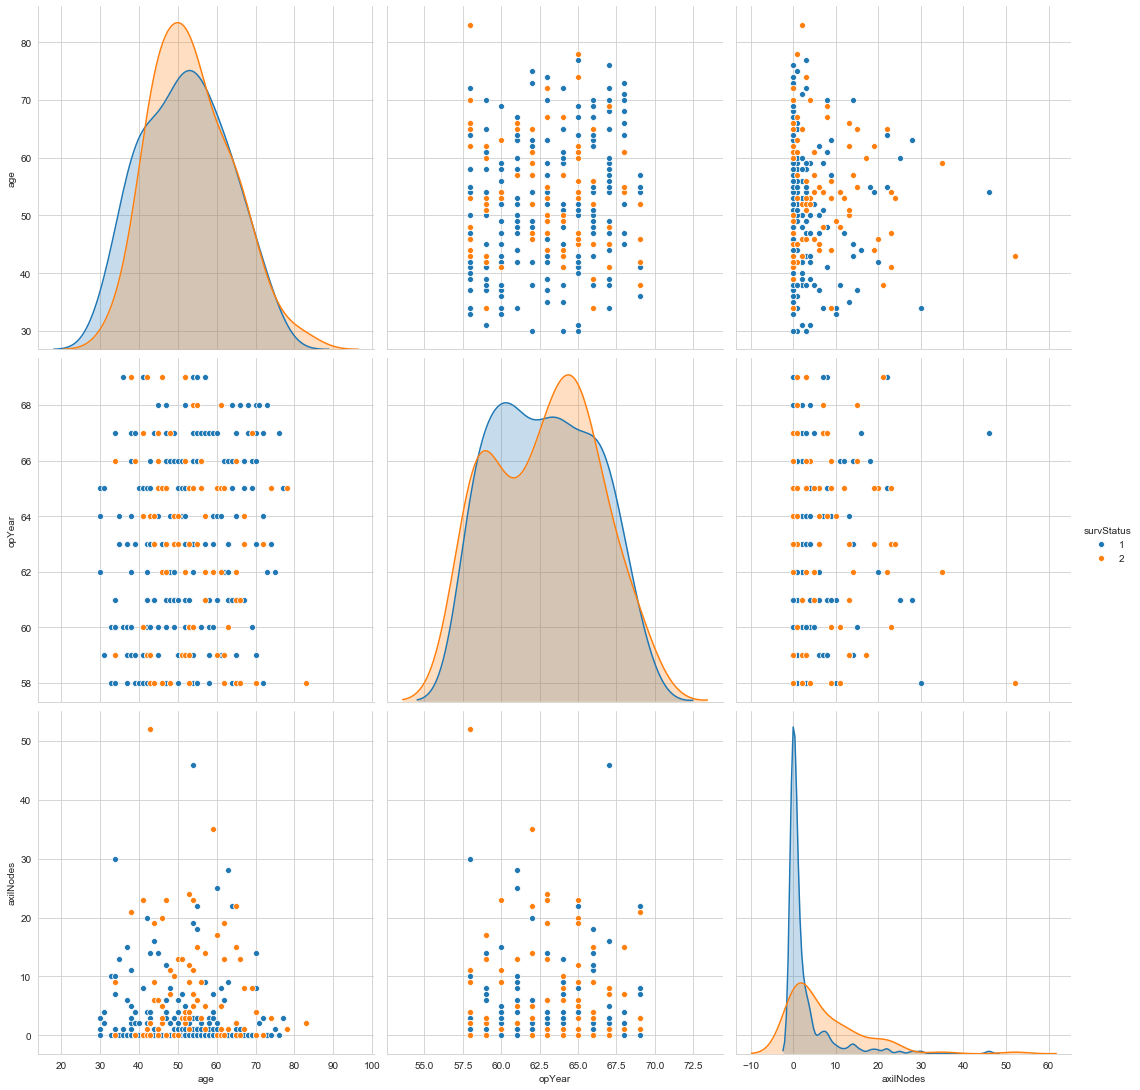

In [41]:
sns.pairplot(data, hue="survStatus", height=5)

Multivariate analysis is looking at the distribution of more than one feature at a time.

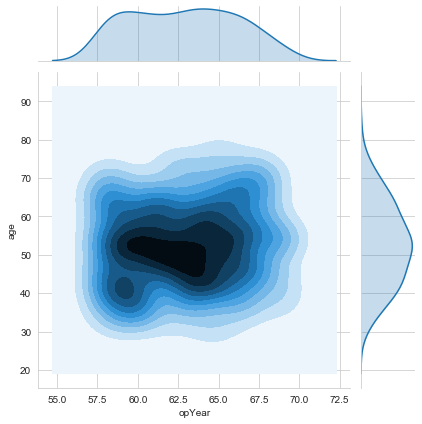

In [43]:
g = sns.jointplot(x="opYear", y="age", data=data,kind="kde")